## Visualize Ground-Truth Shape Hierarchy of Graphs and Edge Relationships (Point cloud)

0
12
13
17
16
15
14
9
10
11
1
2
8
7
6
5
4
3


<IPython.core.display.Javascript object>


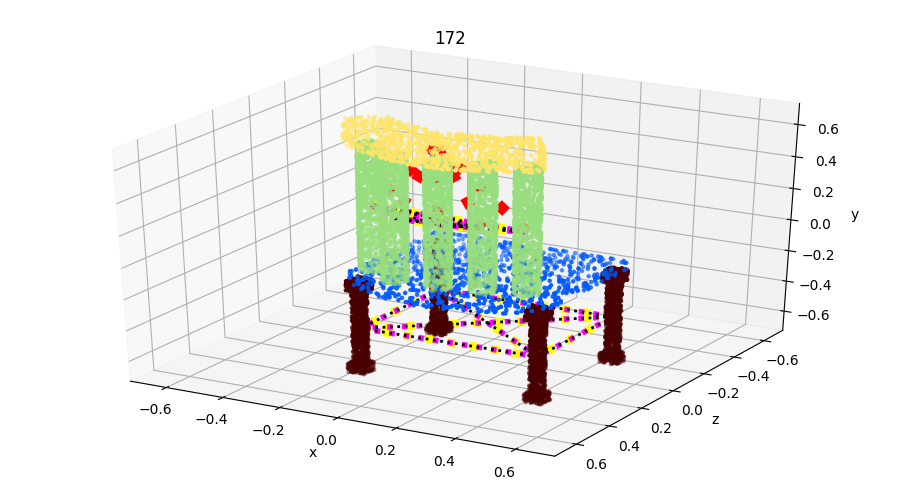

PartNet Hierarchy: (the number in bracket corresponds to PartNet part_id)
0 chair    {0}
  ├0 chair_back    {1}
  |  ├0 back_surface    {2}
  |  |  ├0 back_surface_vertical_bar [LEAF] {3}
  |  |  ├1 back_surface_vertical_bar [LEAF] {4}
  |  |  ├2 back_surface_vertical_bar [LEAF] {5}
  |  |  ├3 back_surface_vertical_bar [LEAF] {6}
  |  |  ├4 back_surface_horizontal_bar [LEAF] {7}
  |  |  ├5 back_surface_vertical_bar [LEAF] {8}
  ├1 chair_seat    {9}
  |  ├0 seat_surface    {10}
  |  |  ├0 seat_single_surface [LEAF] {11}
  ├2 chair_base    {12}
  |  ├0 regular_leg_base    {13}
  |  |  ├0 leg [LEAF] {14}
  |  |  ├1 leg [LEAF] {15}
  |  |  ├2 leg [LEAF] {16}
  |  |  ├3 leg [LEAF] {17}



In [2]:
%matplotlib notebook

import os
import matplotlib
from data import PartNetDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# ground-truth data directory
root_dir = '../data/partnetdata/chair_hier'

# read all data
obj_list = sorted([int(item.split('.')[0]) for item in os.listdir(root_dir) if item.endswith('.json')])

# visualize one data
obj_id = 0
obj = PartNetDataset.load_object(os.path.join(root_dir, str(obj_list[obj_id])+'.json'), load_geo=True)

# edge visu: ADJ (red), ROT_SYM (yellow), TRANS_SYM (purple), REF_SYM (black)
draw_partnet_objects(objects=[obj], object_names=[str(obj_list[obj_id])], 
                     figsize=(9, 5), leafs_only=True, visu_edges=True, rep='geos',
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')

print('PartNet Hierarchy: (the number in bracket corresponds to PartNet part_id)')
print(obj)

## VAE Reconstruction (not render faces)

In [1]:
%matplotlib notebook

import os
import matplotlib
from datav1 import PartGraphShapesDataset, Tree
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# results directory
root_dir = '../data/results/box_ae_chair_leaf215'
Tree.load_category_info('Chair')

# read all data
obj_list = sorted([int(item) for item in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, item))])

# visualize one data
obj_id =2
#obj_dir = os.path.join(root_dir, str(obj_list[obj_id]),'interpolate')
obj_dir = os.path.join(root_dir, str(obj_list[obj_id]))
print(obj_dir)

orig_obj = PartGraphShapesDataset.load_object(os.path.join(obj_dir, 'orig.json'), Tree)
recon_obj = PartGraphShapesDataset.load_object(os.path.join(obj_dir, 'recon.json'), Tree)
    
# draw_partnet_objects(objects=[orig_obj, recon_obj], object_names=['original', 'reconstruction'], 
#                      figsize=(9, 5), leafs_only=True, visu_edges=True, rep='geos',
#                      sem_colors_filename=['../stats/semantics_colors/Lamp.txt','../stats/semantics_colors/Lamp.txt'])
draw_partnet_objects(objects=[orig_obj, recon_obj], object_names=['original', 'reconstruction'], 
                     figsize=(9, 5), leafs_only=True, visu_edges=True, rep='geos',
                     sem_colors_filename=['../stats/semantics_colors/Chair.txt','../stats/semantics_colors/Chair.txt'])
                     #save_file_name = [os.path.join(obj_dir, 'orig.obj'),os.path.join(obj_dir, 'recon.obj')],
                     #mtl_file = '../stats/semantics_colors/Chair.mtl')

print('Original Structure:')
print(orig_obj)
print('Reconstructed Structure:')
print(recon_obj)

ModuleNotFoundError: No module named 'matplotlib'